In [215]:
import os
import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline


In [ ]:
data_root = os.path.join(os.getcwd(), "data")

In [3]:
os.listdir(data_root)

['Womens Clothing E-Commerce Reviews.csv']

In [58]:
plot_color = '#FFB6C1'  # Light pink color

### Read data 

data source: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [221]:
data_file = os.path.join(data_root, "Womens Clothing E-Commerce Reviews.csv")
data_df = pd.read_csv(data_file, index_col=0)

In [222]:
data_df.sample(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1301,1028,35,Great denim,I usually wear a size 28 & the fit was perfect...,5,1,2,General,Bottoms,Jeans
12577,883,40,Beautiful print,The fabric is soft and the colors are bright. ...,4,1,0,General Petite,Tops,Knits
5811,1056,62,Small!,I finally ordered this at this incredible mark...,3,0,3,General,Bottoms,Pants
16174,936,36,NaN,I love this sweater. looks great with leggings...,5,1,0,General Petite,Tops,Sweaters
3504,1070,57,Beautiful jumpsuit,Perfect fit for my size. it elongate my petite...,5,1,0,General,Bottoms,Pants
2806,827,26,Love this too,"Such a cute top. does run slightly big, depend...",5,1,0,General,Tops,Blouses
18924,674,49,Maybe....,I'm still on the fence about these. i realize ...,3,1,1,General Petite,Intimate,Lounge
20589,984,48,Very impressed!,Received this jacket today and i am so very im...,5,1,1,General,Jackets,Jackets
17397,1068,33,Absolutely beautiful!,"For reference, i'm currently hovering in the 1...",5,1,11,General,Bottoms,Pants
18198,1096,35,Lovely dress,I love this dress. length falls as shown on mo...,4,1,0,General,Dresses,Dresses


#### randomly fill na 

In [149]:
# Set the random seed for reproducibility 
np.random.seed(42)

# Define the percentage of rows to assign a value
percentage = 0.3  # 30% of rows

# Calculate the number of rows to select
num_rows = int(percentage * len(data_df))

# Randomly select the rows to assign a value
random_rows = data_df.sample(n=num_rows)

# Assign a value to the selected rows
data_df.loc[random_rows.index, "Review Text"] = ""


#### Drop duplicates 

In [206]:
data_df = data_df.drop_duplicates().copy()

### Investigate data briefly

In [150]:
data_df.shape

(23486, 10)

In [151]:
data_df.columns.values

array(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], dtype=object)

In [152]:
data_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,,5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [153]:
data_df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [154]:
abt_data_types["Clothing ID"] = "not-sure"
abt_data_types["Age"] = "continious"
abt_data_types["Title"] = "text"
abt_data_types["Review Text"] = "text"
abt_data_types["Rating"] = "categorical"
abt_data_types["Recommended IND"] = "not-sure"
abt_data_types["Positive Feedback Count"] = "continious"
abt_data_types["Division Name"] = "categorical"
abt_data_types["Department Name"] = "categorical"
abt_data_types["Class Name"] = "categorical"

### Univariate analyses

#### The ones that I am not so sure 

* clothing id 

In [155]:
data_df["Clothing ID"].nunique()

1206

In [156]:
abt_data_types["Clothing ID"] = "categorical"

* recommend ind 

In [157]:
data_df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [158]:
abt_data_types["Recommended IND"] = "categorical"

#### Categoricals 

In [216]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


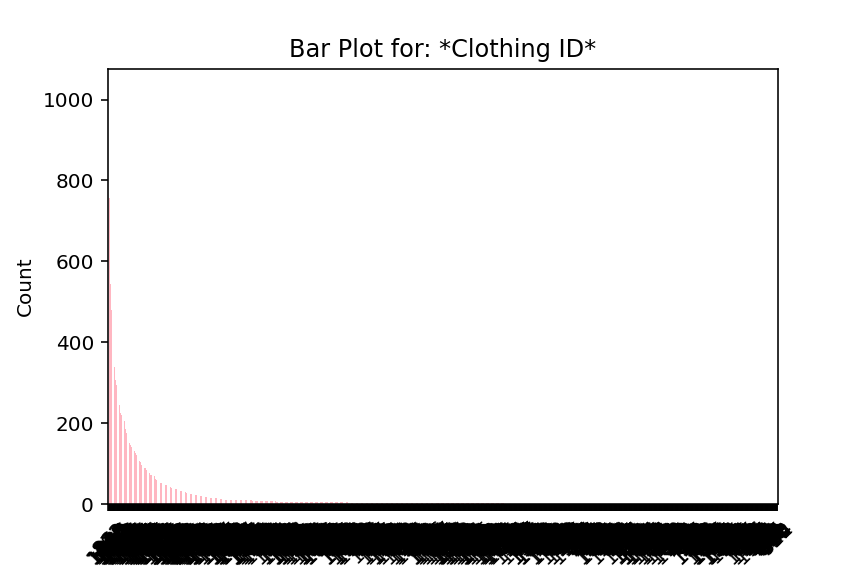

<IPython.core.display.Javascript object>


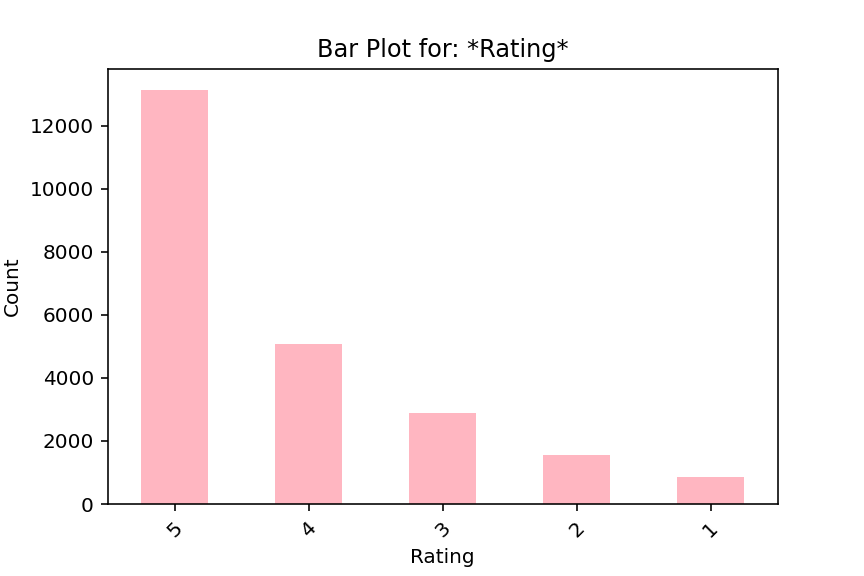

<IPython.core.display.Javascript object>


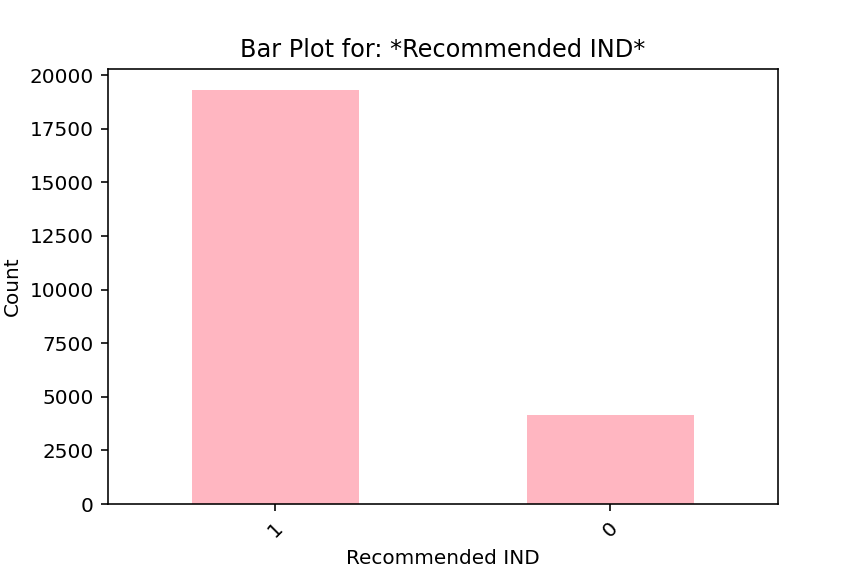

<IPython.core.display.Javascript object>


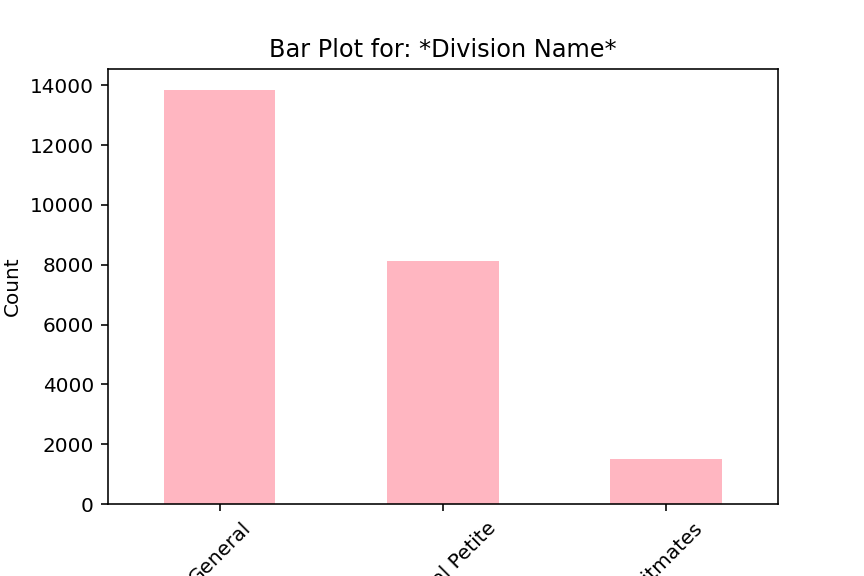

<IPython.core.display.Javascript object>


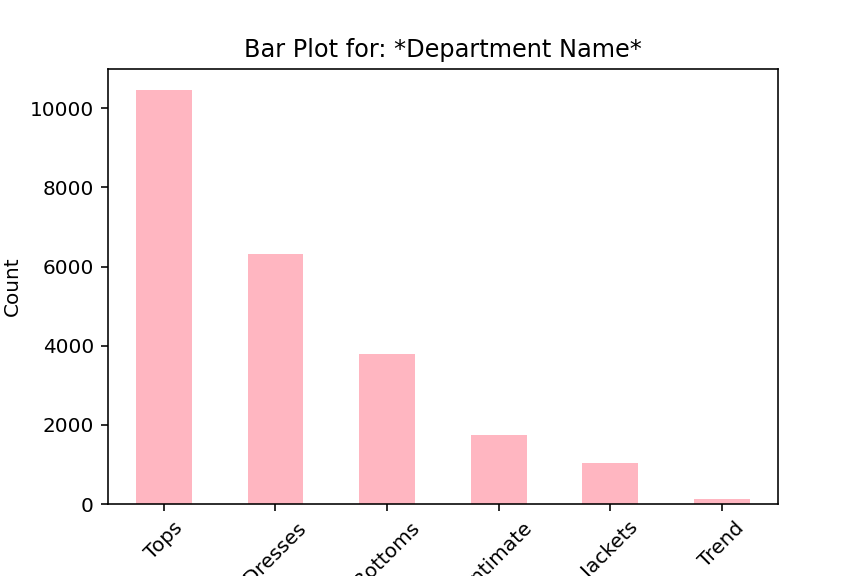

<IPython.core.display.Javascript object>


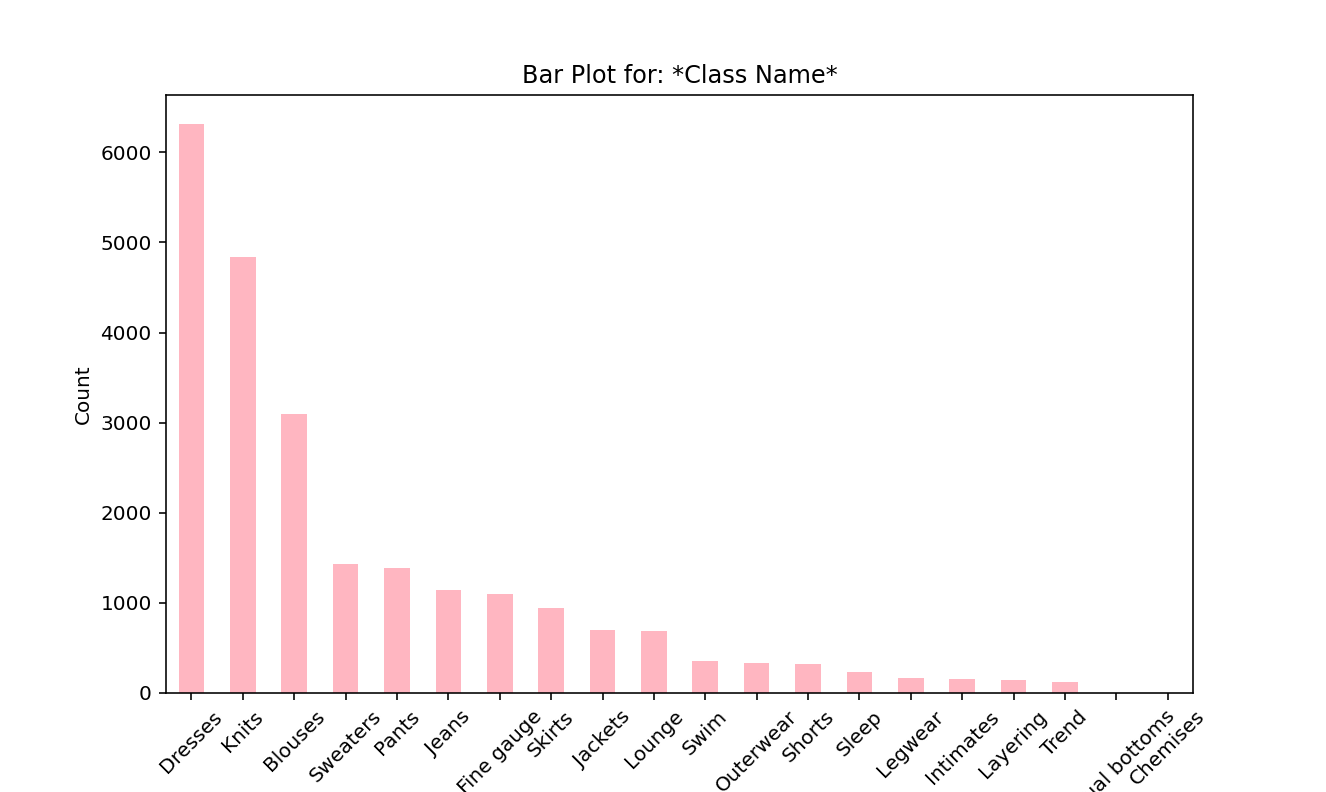

In [88]:
# Loop through each column and draw a bar plot
for column, dtype in abt_data_types.items():
    if dtype == "categorical":
        plt.figure(num=f'* {column} *')  
        data_df[column].value_counts().plot(kind='bar', color=plot_color)
        plt.title(f'Bar Plot for: *{column}*')
        plt.xlabel(column)
        plt.ylabel('Count')
            
        plt.xticks(rotation=45)

        plt.show()


#### Continious columns 

<IPython.core.display.Javascript object>


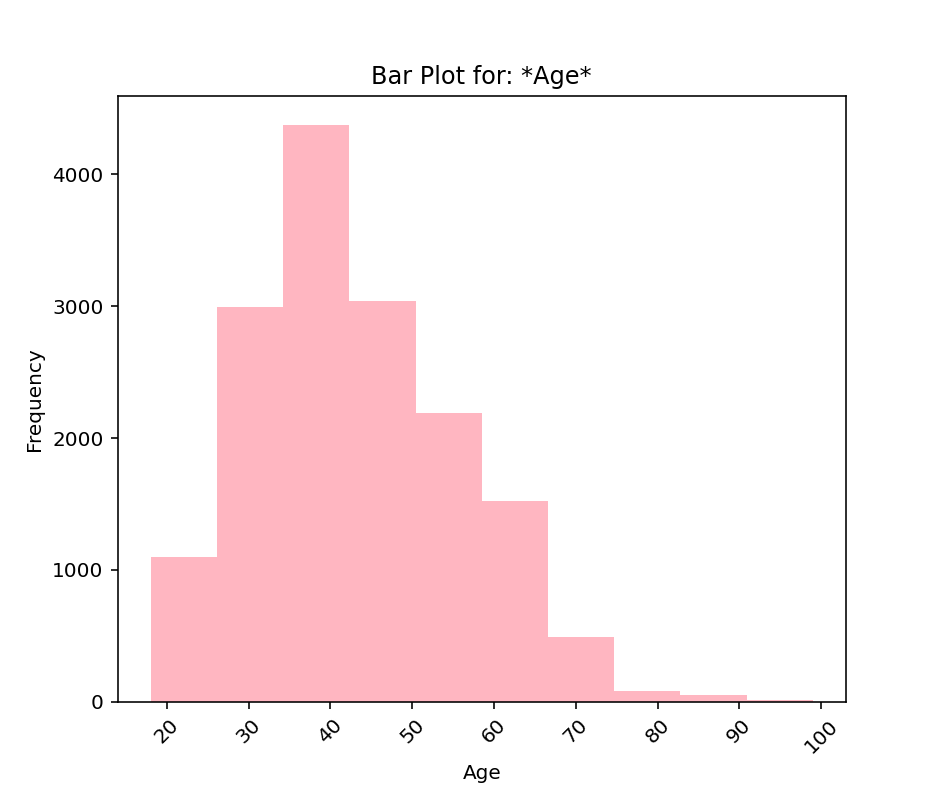

<IPython.core.display.Javascript object>


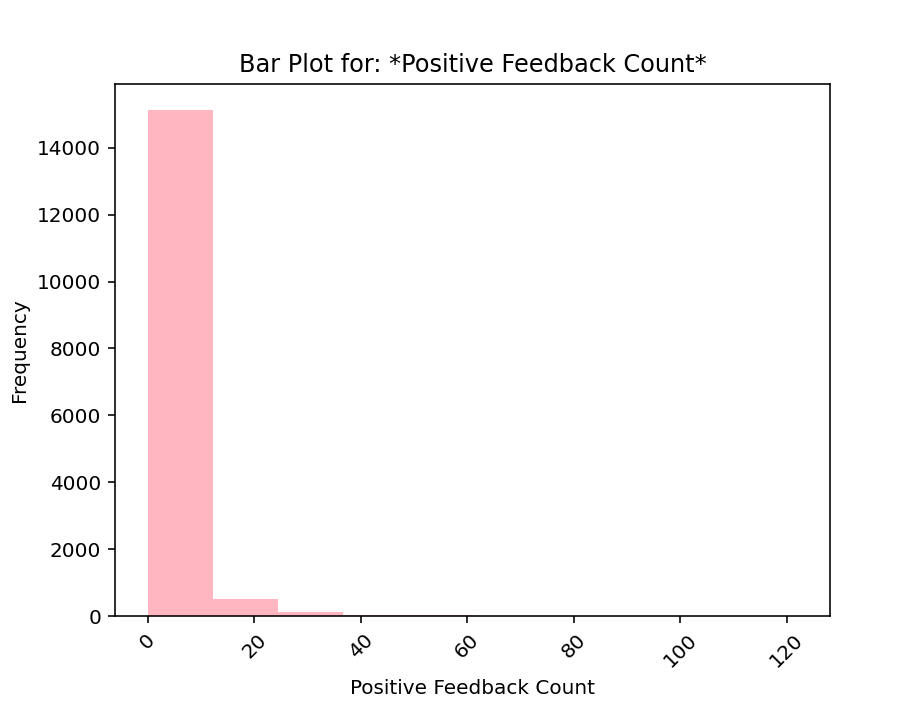

In [204]:
# Loop through each column and draw a bar plot
for column, dtype in abt_data_types.items():
    if dtype == "continious":
        plt.figure(num=f'* {column} *')  
        data_df[column].plot.hist(color=plot_color)
        plt.title(f'Bar Plot for: *{column}*')
        plt.xlabel(column)
        plt.ylabel('Frequency')
            
        plt.xticks(rotation=45)

        plt.show()


### Data Quality Report 

_For continious variables_


* minimum 
* 1st quartile 
* mean 
* median 
* 3rd quartile 
* maximum 
* standard deviation 
* total number of instances 
* % of instances in ABT that are missing a value 
* cardinality (# of unique values in that feature)

_For categorical variables_

* mode 1 (most frequent value) 
* raw frequency of mode 1 
* % frequency of mode 1 
* mode 2 (2nd most frequent value)
* raw frequency of mode 2
* % frequency of mode 2
* % of instances in ABT that are missing a value 
* cardinality

In [180]:
def feature_wise_dqr(a_series, feature, data_type, round_to=2):
    """
    Prepare 
    :param a_series: pandas.DataFrame.series
    :param data_type: 
    """
    report_dict = dict()
    report_dict["feature"]     = feature


    if data_type == "continious":
        #print("* Computing for continoius features")
        report_dict["missing_prc"] = round(len(a_series[a_series.isna()]) / len(a_series) * 100, round_to)
        report_dict["cardinality"] = a_series.nunique() 
        report_dict["min"]    = round(a_series.min(), round_to)
        report_dict["1st_q"]  = round(a_series.quantile([.25]).values[0], round_to)
        report_dict["mean"]   = round(a_series.mean(), round_to)
        report_dict["median"] = round(a_series.median(), round_to)
        report_dict["3rd_q"]  = round(a_series.quantile([.75]).values[0], round_to)
        report_dict["max"]    = round(a_series.max(), round_to)
        report_dict["std"]    = round(a_series.std(), round_to)

        
    elif data_type == "categorical":
        #print("* Computing for categorical features")
        report_dict["missing_prc"] = round(len(a_series[a_series.isna()]) / len(a_series) * 100, round_to)
        report_dict["cardinality"] = a_series.nunique() 
        report_dict["mode1"]           = a_series.mode().values[0]
        report_dict["mode1_freq_raw"]  = a_series.value_counts().iloc[0]
        report_dict["mode1_freq_perc"] = round((report_dict["mode1_freq_raw"]/len(a_series)*100),round_to)
        report_dict["mode2"]           = a_series.value_counts().index[1]
        report_dict["mode2_freq_raw"]  = a_series.value_counts().iloc[1] if report_dict["cardinality"] > 1 else np.nan 
        report_dict["mode2_freq_perc"] = round((report_dict["mode2_freq_raw"]/len(a_series)*100),round_to)

    elif data_type == "text":
        token_counts = [len(x.split()) if type(x) is str else 0 for x in a_series]
        char_counts = [len(x) if type(x) is str else 0 for x in a_series]
        report_dict["missing_prc"] = round(sum(1 for value in char_counts if value < 2) / len(a_series) * 100, round_to)
        report_dict["mean_tok_count"]    = round(np.mean(token_counts), round_to)
        report_dict["mean_char_count"]    = round(np.mean(char_counts), round_to)
        report_dict["std_token_count"]    = round(np.std(token_counts), round_to)
        report_dict["std_char_count"]    = round(np.std(char_counts), round_to)
        report_dict["max_tok_count"]    = round(np.max(token_counts), round_to)
        report_dict["max_char_count"]    = round(np.max(char_counts), round_to)
        report_dict["tok_count_1st_q"]  = np.quantile(token_counts, 0.25)
        report_dict["tok_count_2nd_q"]  = np.quantile(token_counts, 0.5)
        report_dict["tok_count_3nd_q"]  = np.quantile(token_counts, 0.75)



    return report_dict


def df_wise_dqr(a_df, abt_dtypes):
    """
    Computes a pandas.DataFrame wise data quality report
    requires an abl data types dict to map the df columns into data types such as
    categorical and continious 
    """
    categorical_dqr = list()
    continious_dqr  = list()
    texts_dqr = list()
    for feature, data_type in abt_dtypes.items():
        dqr_of_feature = feature_wise_dqr(a_df[feature],
                                         feature, 
                                         data_type)
        if data_type == "categorical":
            categorical_dqr.append(dqr_of_feature)
        elif data_type == "continious":
            continious_dqr.append(dqr_of_feature)
        elif data_type == "text":
            texts_dqr.append(dqr_of_feature)
            

    return {"categorical": pd.DataFrame(categorical_dqr), 
            "continious": pd.DataFrame(continious_dqr),
            "text": pd.DataFrame(texts_dqr)}
        

In [181]:
dqr = df_wise_dqr(data_df, abt_data_types)

In [182]:
dqr["categorical"]

,feature,missing_prc,cardinality,mode1,mode1_freq_raw,mode1_freq_perc,mode2,mode2_freq_raw,mode2_freq_perc
0,Clothing ID,0.00,1206,1078,1024,4.36,862,806,3.43
1,Rating,0.00,5,5,13131,55.91,4,5077,21.62
2,Recommended IND,0.00,2,1,19314,82.24,0,4172,17.76
3,Division Name,0.06,3,General,13850,58.97,General Petite,8120,34.57
4,Department Name,0.06,6,Tops,10468,44.57,Dresses,6319,26.91
5,Class Name,0.06,20,Dresses,6319,26.91,Knits,4843,20.62


In [183]:
dqr["continious"]

,feature,missing_prc,cardinality,min,1st_q,mean,median,3rd_q,max,std
0,Age,0.0,77,18,34.0,43.20,41.0,52.0,99,12.28
1,Positive Feedback Count,0.0,82,0,0.0,2.54,1.0,3.0,122,5.70


In [184]:
dqr["text"]

,feature,missing_prc,mean_tok_count,mean_char_count,std_token_count,std_char_count,max_tok_count,max_char_count,tok_count_1st_q,tok_count_2nd_q,tok_count_3nd_q
0,Title,16.22,2.80,16.0,2.06,11.24,12,52,2.0,3.0,4.0
1,Review Text,32.55,40.68,208.6,36.76,187.26,115,508,0.0,37.0,73.0


### Data Quality Plan 

In data quality plan we will look to solve/report some issues due to valid data / invalid data errors. Issues in valid data may be originated because of the domain specific features, ill-distributed sampling, not being able to collect some features for some set of instances, fat fingers etc, whereas the issues with ininvalid data mostly aries from the generation error during the composition of ABT. 

A plausible way to hande invalid data errors is to re-generate the ABT, but in our case we have no chance to re-generate the ABT. So my strategy to handle the invalid data errors will be to simply discard them. 

During data quelity plan, we will test features' accountability due to following factors, and detect them to come up with a strategy during the modeling phase. 
1. Missing values 
2. Irregular cardinality 
3. Outliers

#### Remove missing values in reviews 

In [190]:
data_df = data_df[data_df.apply(lambda x: False if len(x["Review Text"]) < 1 else True , axis=1)].copy()

In [191]:
data_df.shape

(15842, 10)

#### Irregular Cardinality in product id 

In [193]:
data_df["Clothing ID"].value_counts()

1078    718
862     524
1094    523
1081    401
872     374
       ... 
386       1
1163      1
438       1
68        1
522       1
Name: Clothing ID, Length: 1011, dtype: int64

#### Outliers 

In [219]:
def check_borders(the_dqr, feature):
    """
    Check if one of the bounds of feature is actually an outlier. 
    :param the_dqr: the dqr in pandas.DataFrame
    :param feature: in string 
    """
    results = list()
    # check whether the max value is an outlier 
    dqr_dict         = the_dqr.set_index("feature").to_dict("index")
    max_outlier_prob = abs(abs(abs(dqr_dict[feature]["3rd_q"] - dqr_dict[feature]["max"]) 
                       - abs(dqr_dict[feature]["3rd_q"] - dqr_dict[feature]["median"]))) /(abs(dqr_dict[feature]["max"] - dqr_dict[feature]["min"])) * 100 
        
        
    min_outlier_prob =  abs(abs(dqr_dict[feature]["1st_q"] - dqr_dict[feature]["min"]) -
                            abs(dqr_dict[feature]["1st_q"] - dqr_dict[feature]["median"]))/(abs(dqr_dict[feature]["max"] - dqr_dict[feature]["min"])) * 100 
    
    results.append((feature, "min_being_outlier", min_outlier_prob))
    results.append((feature, "max_being_outlier", max_outlier_prob))

    return results

In [220]:
check_borders(dqr["continious"], "Age")

[('Age', 'min_being_outlier', 11.11111111111111),
 ('Age', 'max_being_outlier', 44.44444444444444)]

<IPython.core.display.Javascript object>


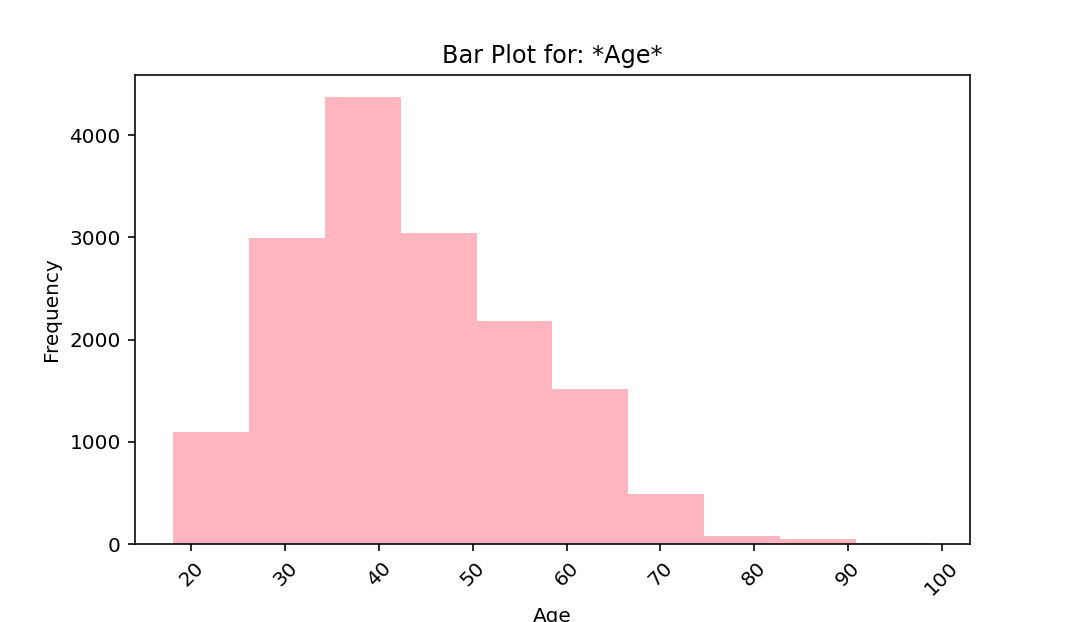

In [218]:
column = "Age"
plt.figure(num=f'* {column} *')  
data_df[column].plot.hist(color=plot_color)
plt.title(f'Bar Plot for: *{column}*')
plt.xlabel(column)
plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.show()

In [205]:
data_df[data_df["Age"] > 80]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
95,863,83,Casual elegance!,"Purchased this top online, and when i received...",5,1,14,General,Tops,Knits
234,840,83,Pretty but runs large!,I ordered this top in my usual size and am exc...,5,1,0,General,Tops,Blouses
277,868,83,Sooooooooo cute!,"Love this top!\nit is a full/ swing top, but t...",5,1,1,General,Tops,Knits
659,252,93,Amazing suit!,"This is by far the cutest, most glamorous one ...",5,1,3,Initmates,Intimate,Swim
846,1078,82,Great dress!!,"I am 5'4"" 140 pounds and ordered the 8 petite....",5,1,5,General Petite,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...
22436,872,83,Beautiful beautiful top!,"I ordered this online, with a little hesitatio...",5,1,3,General Petite,Tops,Knits
22716,1087,87,NaN,This dress fits great and is very warm for the...,4,1,0,General Petite,Dresses,Dresses
22773,949,83,Scottish classic,Received this jacket yesterday...and it is lov...,5,1,0,General,Tops,Sweaters
23001,298,83,Beautiful twist on a classic,I found this top to be very beautiful and well...,5,1,3,General Petite,Intimate,Lounge


#### Handling Outliers

* Clamp transformation 
* Removing 

In [ ]:
def clamp_transformation(data_df, feature, bounds=tuple(), verbose=True):
    """
    Performs clamp transformation, when bounds set, transformation uses
    user defined bounds else it will automatically decide the boundaries
    :param data_df: pandas.DataFrame
    :param bounds: a tuple correspinding(lower_bound, upper_bound)
    """
    def _transform(value, _lower_bound, _upper_bound):
        if value < _lower_bound:
            return _lower_bound
        elif value > _upper_bound:
            return _upper_bound
        else:
            return value

    if bounds:
        lower_bound = bounds[0]
        upper_bound = bounds[1]
    else:
        dqr_dict = feature_wise_dqr(data_df[feature], feature, "continious")
        interquartile_range = dqr_dict["3rd_q"] - dqr_dict["1st_q"]
        lower_bound = dqr_dict["1st_q"] - 1.5*interquartile_range
        upper_bound = dqr_dict["3rd_q"] + 1.5*interquartile_range
    print("** Lower bound set to {}, Upper bound set to {}".format(lower_bound, upper_bound))
    data_df[feature] = data_df[feature].apply(lambda x: _transform(x, lower_bound, upper_bound))
